### Seattle Police Department 911 Incident Response

#### Columns in this Dataset

- CAD CDW ID
- CAD Event Number
- General Offense Number
- Event Clearance Code	
- Event Clearance Description
- Event Clearance SubGroup	
- Event Clearance Group	
- Hundred Block Location
- District/Sector	
- Zone/Beat	
- Census Tract	
- Longitude	
- Latitude	
- Incident Location	
- Initial Type Description	
- Initial Type Subgroup	
- Initial Type Group	
- At Scene Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Seattle 911 calls:
    - 1,455,211 records
    - From July 2010 To September 2017
    
    What will this look like?
    
    Will most center around downtown, suburbs, the bad places?
    
    What kind of calls, mostly violent or non violent?

In [89]:
locations = pd.read_csv('Seattle_Police_Department_911_Incident_Response.csv',
                        dtype={'incident_location': np.str, 'zone_beat': np.str}, low_memory=False)

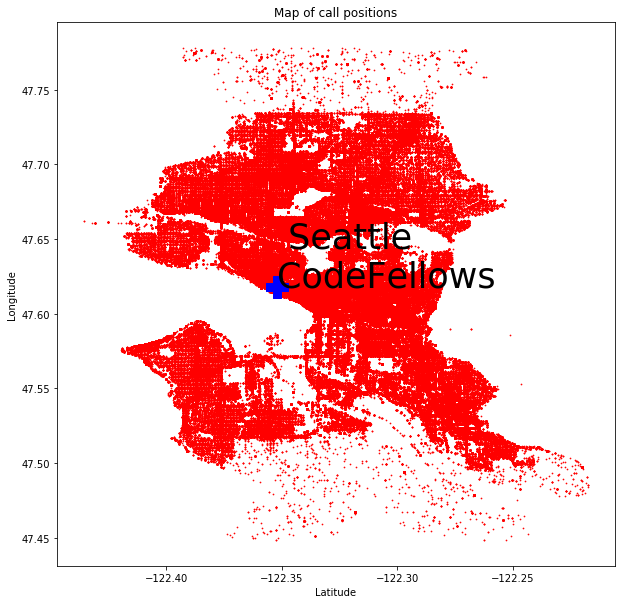

In [116]:
plt.figure(figsize=(10,10))

plt.scatter(locations.Longitude, locations.Latitude, s=0.5, c='red')
plt.scatter(-122.352005, 47.6182, s=500, c='blue', marker='P')
plt.text(-122.352005, 47.6182, ' Seattle\nCodeFellows', fontsize=35)
plt.title('Map of call positions')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

It's pretty suprising how this plots out. Compared to a map of the city it gets fuzy on the outskirts. The calls are definately centered around all of the highly populated areas. I wonder how much of this is related to the homeless population.

### How many unique calls

    Types of unique calls:

In [118]:
call_type = set(locations['Event Clearance Group'])

In [120]:
len(call_type)

45

In [119]:
call_type

{nan,
 'FRAUD CALLS',
 'SHOPLIFTING',
 'BURGLARY',
 'HAZARDS',
 'PROPERTY DAMAGE',
 'FALSE ALACAD',
 'WEAPONS CALLS',
 'TRESPASS',
 'MENTAL HEALTH',
 'HOMICIDE',
 'BIKE',
 'TRAFFIC RELATED CALLS',
 'PROSTITUTION',
 'FALSE ALARMS',
 'ARREST',
 'OTHER VICE',
 'DRIVE BY (NO INJURY)',
 'SUSPICIOUS CIRCUMSTANCES',
 'OTHER PROPERTY',
 'PERSONS - LOST, FOUND, MISSING',
 'PROPERTY - MISSING, FOUND',
 'NUISANCE, MISCHIEF ',
 'HARBOR CALLS',
 'ACCIDENT INVESTIGATION',
 'ANIMAL COMPLAINTS',
 'AUTO THEFTS',
 'CAR PROWL',
 'LEWD CONDUCT',
 'PERSON DOWN/INJURY',
 'MISCELLANEOUS MISDEMEANORS',
 'RECKLESS BURNING',
 'NUISANCE, MISCHIEF',
 'ROBBERY',
 'PUBLIC GATHERINGS',
 'VICE CALLS',
 'FAILURE TO REGISTER (SEX OFFENDER)',
 'MOTOR VEHICLE COLLISION INVESTIGATION',
 'DISTURBANCES',
 'LIQUOR VIOLATIONS',
 'PROWLER',
 'NARCOTICS COMPLAINTS',
 'BEHAVIORAL HEALTH',
 'ASSAULTS',
 'THREATS, HARASSMENT'}

### Seattle 911 police response locations (in red) as compared to call locations (in black):
    - 1000 records
    - November 20 2017 1600hrs - November 23 2017 0900hrs

In [33]:
locations2 = pd.read_json('https://data.seattle.gov/resource/pu5n-trf4.json',
                        dtype={'incident_location': np.str, 'zone_beat': np.str})

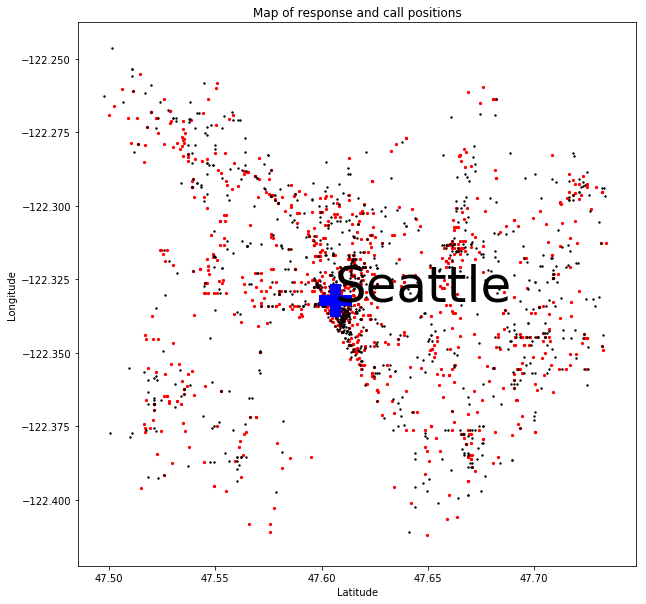

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(locations2.latitude, locations2.longitude, s=5, c='red')
plt.scatter(locations.latitude, locations.longitude, s=1.9, c='black')
plt.scatter(47.6062, -122.3321, s=1000, c='blue', marker='P')

plt.title('Map of response and call positions')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.text(47.6062, -122.3321, 'Seattle', fontsize=50)
plt.show()

There is definately a higher conentration around the city center. I'm not certain why a high percentage of call vs. response are in different locations, but its interesting to look at.